## 参考文献
- [Qiita](https://qiita.com/motokimura/items/d155d532a5f1dd02089c#tldr)  
- [公式HP](https://gdo152.llnl.gov/cowc/)

In [1]:
import os
import glob

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Count

In [2]:
df_train = pd.read_table('../data/COWC_train_list_64_class.txt',header=None,names=['file_name','count'],sep=' ')
df_test = pd.read_table('../data/COWC_test_list_64_class.txt',header=None,names=['file_name','count'],sep=' ')
df_train['city'] = df_train.file_name.apply(lambda x: x.split('/')[0])
df_test['city'] = df_test.file_name.apply(lambda x: x.split('/')[0])
df_train['flag'] = 0
df_test['flag'] = 1
df = pd.concat([df_train,df_test])
total=len(df)
df.head()

/home/okamoto/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/home/okamoto/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


file_name  count  \
0  Columbus_CSUAV_AFRL/train/00.00032.01373.030.png      0   
1  Columbus_CSUAV_AFRL/train/00.00034.02382.045.png      0   
2  Columbus_CSUAV_AFRL/train/00.00060.01446.030.png      0   
3  Columbus_CSUAV_AFRL/train/00.00071.01912.030.png      0   
4  Columbus_CSUAV_AFRL/train/00.00071.01912.165.png      0   

                  city  flag  
0  Columbus_CSUAV_AFRL     0  
1  Columbus_CSUAV_AFRL     0  
2  Columbus_CSUAV_AFRL     0  
3  Columbus_CSUAV_AFRL     0  
4  Columbus_CSUAV_AFRL     0

In [3]:
df.groupby(['city','flag'])['count'].describe()

count      mean       std  min  25%  50%   75%  \
city                flag                                                      
Columbus_CSUAV_AFRL 0       7595.0  3.818302  4.669020  0.0  0.0  2.0   7.0   
                    1       2110.0  6.065877  6.648666  0.0  0.0  4.0  10.0   
Potsdam_ISPRS       0      10722.0  2.403656  2.972199  0.0  0.0  1.0   4.0   
                    1       2078.0  2.119346  2.950433  0.0  0.0  1.0   3.0   
Selwyn_LINZ         0      16984.0  1.294218  2.286555  0.0  0.0  0.0   1.0   
                    1       5135.0  1.408374  2.493569  0.0  0.0  0.0   2.0   
Toronto_ISPRS       0      63986.0  2.873160  4.099578  0.0  0.0  1.0   4.0   
                    1      16913.0  3.866671  5.415256  0.0  0.0  2.0   5.0   
Utah_AGRC           0     186930.0  5.019499  7.876574  0.0  0.0  1.0   7.0   
                    1      48172.0  4.400627  7.082258  0.0  0.0  1.0   6.0   
Vaihingen_ISPRS     0      31013.0  2.931771  4.516525  0.0  0.0  1.0   4.0   
                    1       6753.0  2.914408  3.786484  0.0  0.0  2.0   4.0   

                           max  
city                flag        
Columbus_CSUAV_AFRL 0     26.0  
                    1     27.0  
Potsdam_ISPRS       0     18.0  
                    1     16.0  
Selwyn_LINZ         0     14.0  
                    1     16.0  
Toronto_ISPRS       0     30.0  
                    1     34.0  
Utah_AGRC           0     61.0  
                    1     50.0  
Vaihingen_ISPRS     0     41.0  
                    1     21.0

In [4]:
df.groupby(['flag','count']).size()

flag  count
0     0        136344
      1         33155
      2         24375
      3         19307
      4         15498
      5         12496
      6          9551
      7          8194
      8          6922
      9          6025
      10         5341
      11         4251
      12         3896
      13         3389
      14         3048
      15         2755
      16         2561
      17         2215
      18         2120
      19         1875
      20         1713
      21         1557
      22         1414
      23         1237
      24         1031
      25          923
      26          762
      27          663
      28          532
      29          459
                ...  
1     20          416
      21          384
      22          383
      23          306
      24          202
      25          119
      26           70
      27           87
      28           88
      29           73
      30           59
      31           56
      32           57
      33           6

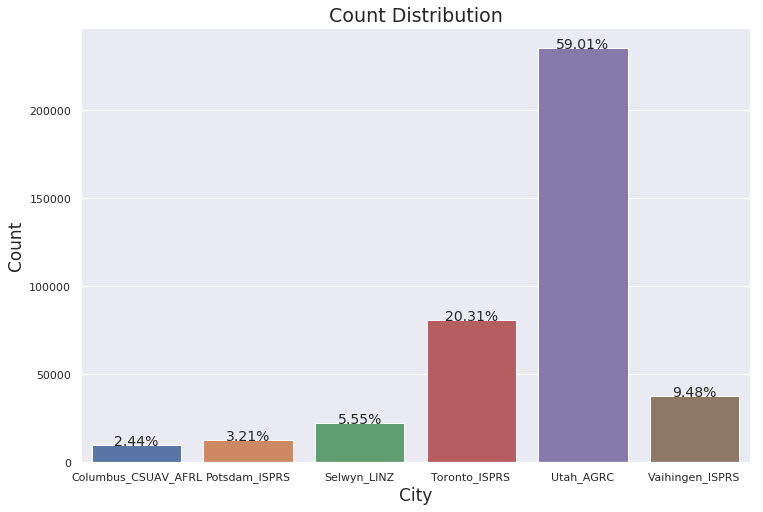

In [5]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='city',data=df)
g.set_title("Count Distribution", fontsize=19)
g.set_xlabel('City',fontsize=17)
g.set_ylabel('Count',fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

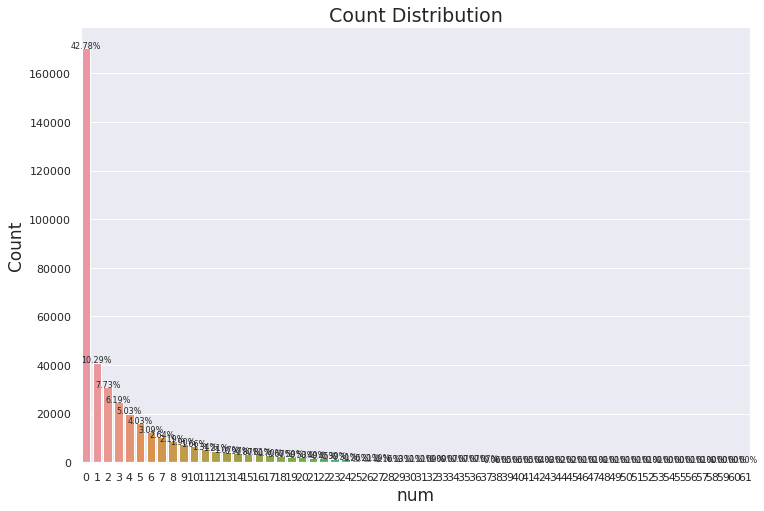

In [6]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='count',data=df)
g.set_title("Count Distribution", fontsize=19)
g.set_xlabel('num',fontsize=17)
g.set_ylabel('Count',fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=8) 

In [7]:
# 10台以上のやつは9台としてまとめる
df['count'] = df['count'].apply(lambda x: x if x<9 else 9)

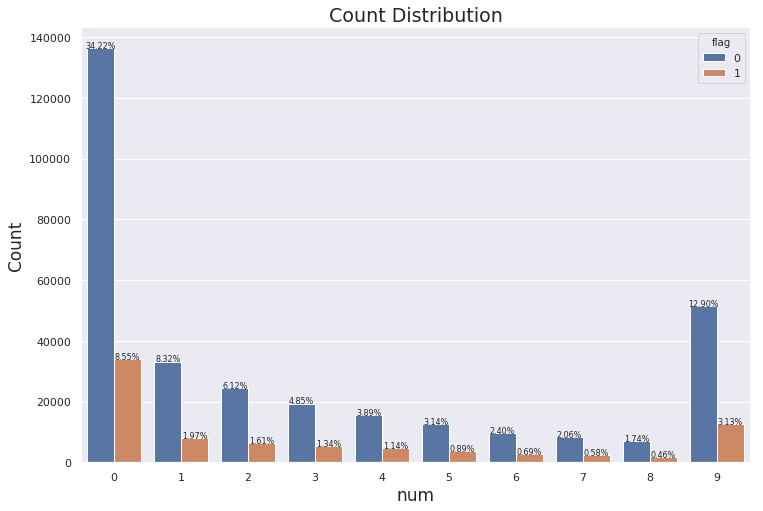

In [8]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='count',hue='flag',data=df)
g.set_title("Count Distribution", fontsize=19)
g.set_xlabel('num',fontsize=17)
g.set_ylabel('Count',fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=8) 

### Image

In [9]:
print(os.listdir('../data/'))

['Potsdam_ISPRS', 'COWC_test_list_64_class.txt', 'testing_scenes', '.ipynb_checkpoints', 'Toronto_ISPRS', 'Selwyn_LINZ', 'Columbus_CSUAV_AFRL', 'Vaihingen_ISPRS', 'Utah_AGRC', 'COWC_train_list_64_class.txt']


In [10]:
# ファイルパスのリストを作る
def make_datapath_list(name='Columbus_CSUAV_AFRL/*',):
    rootpath = '../data/'
    target_path = os.path.join(rootpath+name+'/*.png')
    print(target_path)
    
    path_list = []
    
    for path in glob.glob(target_path):
        path_list.append(path)
    
    return path_list

Columbus = make_datapath_list()
Potsdam = make_datapath_list(name='Potsdam_ISPRS/*')
Selwyn = make_datapath_list(name='Selwyn_LINZ/*')
Toronto = make_datapath_list(name='Toronto_ISPRS/*')
Vaihingen = make_datapath_list(name='Vaihingen_ISPRS/*')
Utah = make_datapath_list(name='Utah_AGRC/*')
test_scene = make_datapath_list(name='testing_scenes')

../data/Columbus_CSUAV_AFRL/*/*.png
../data/Potsdam_ISPRS/*/*.png
../data/Selwyn_LINZ/*/*.png
../data/Toronto_ISPRS/*/*.png
../data/Vaihingen_ISPRS/*/*.png
../data/Utah_AGRC/*/*.png
../data/testing_scenes/*.png


In [11]:
print('Columbus : ', len(Columbus))
print('Potsdam : ', len(Potsdam))
print('Selwyn : ', len(Selwyn))
print('Toronto : ', len(Toronto))
print('Vaihingen : ', len(Vaihingen))
print('Utah : ', len(Utah))

Columbus :  9705
Potsdam :  12800
Selwyn :  22119
Toronto :  80899
Vaihingen :  37766
Utah :  235102


#### Test Scene

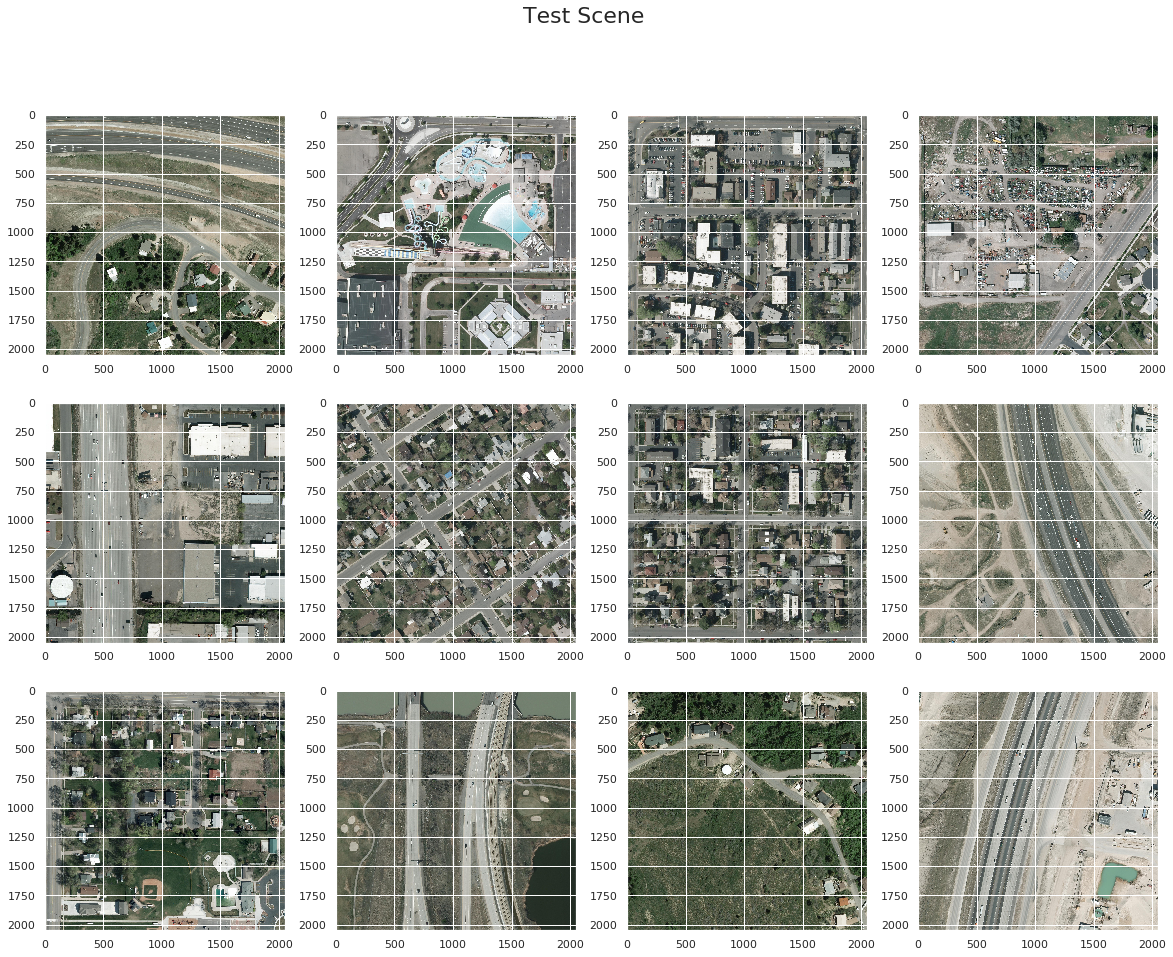

In [15]:
plt.figure(figsize=(20,15))
plt.suptitle('Test Scene', fontsize=22)
for i,file_path in enumerate(test_scene[:12]):
    plt.subplot(3,4,i+1)
    img = Image.open(file_path)
    plt.imshow(img)
    #plt.axis('off')

plt.show()

In [12]:
file_list_dic = {'Columbus': Columbus, 'Potsdam': Potsdam, 'Selwyn':Selwyn,'Toronto':Toronto,'Vaihingen':Vaihingen,'Utah':Utah}

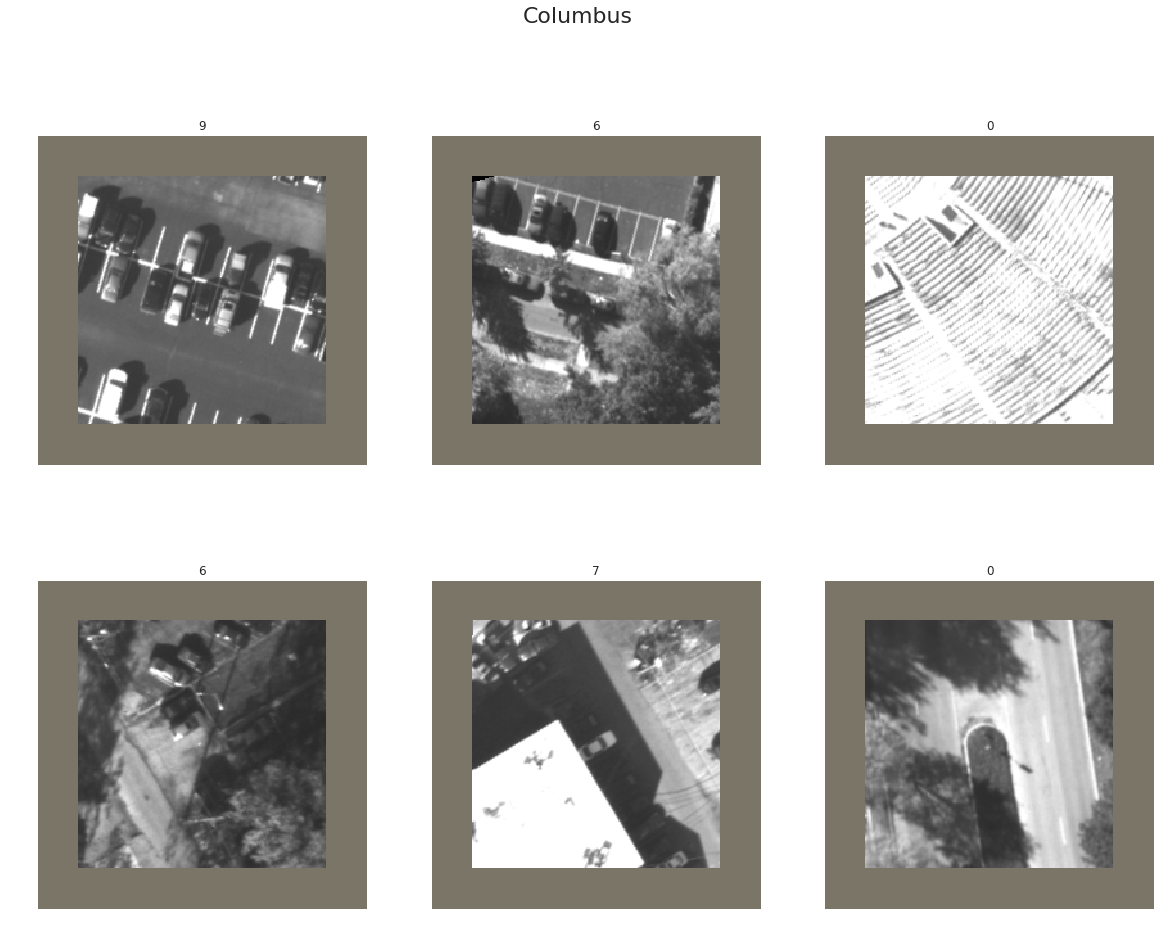

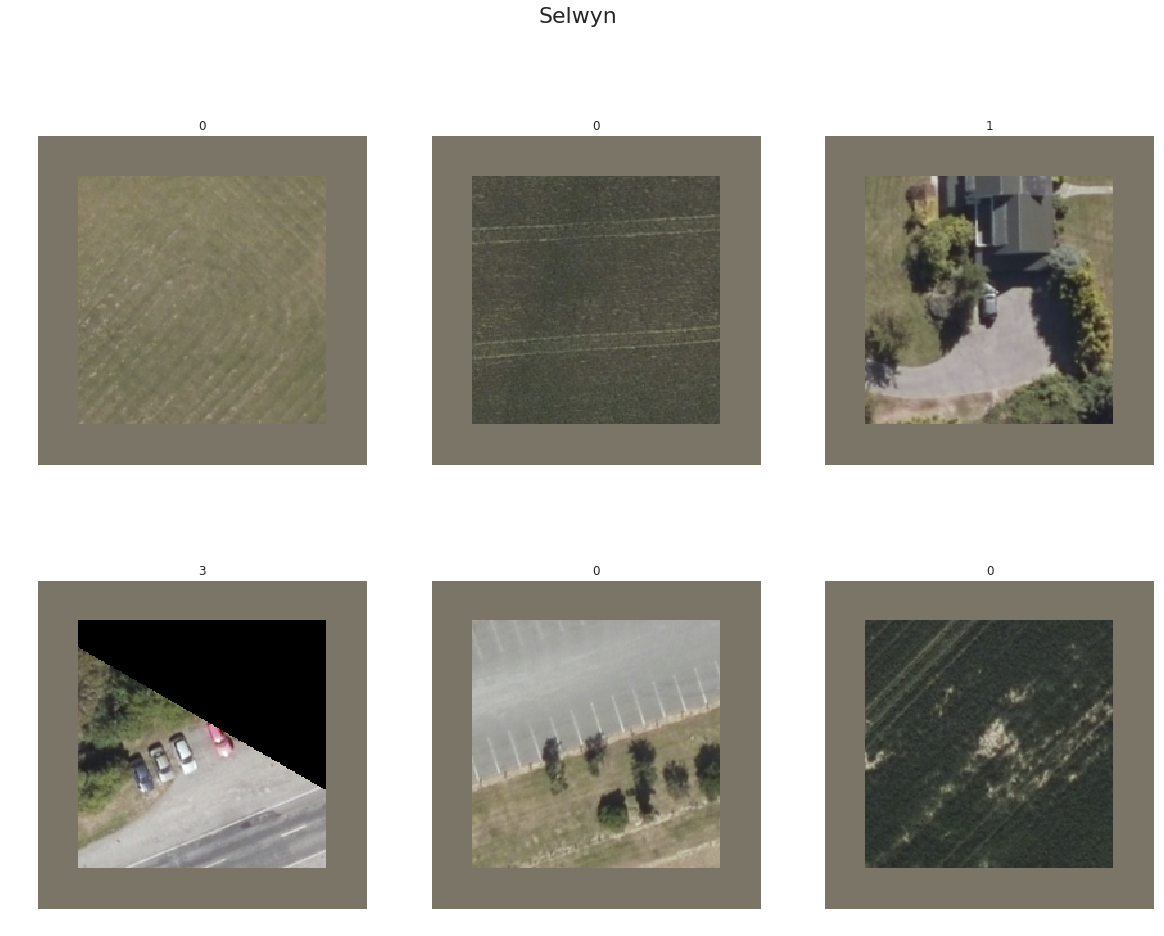

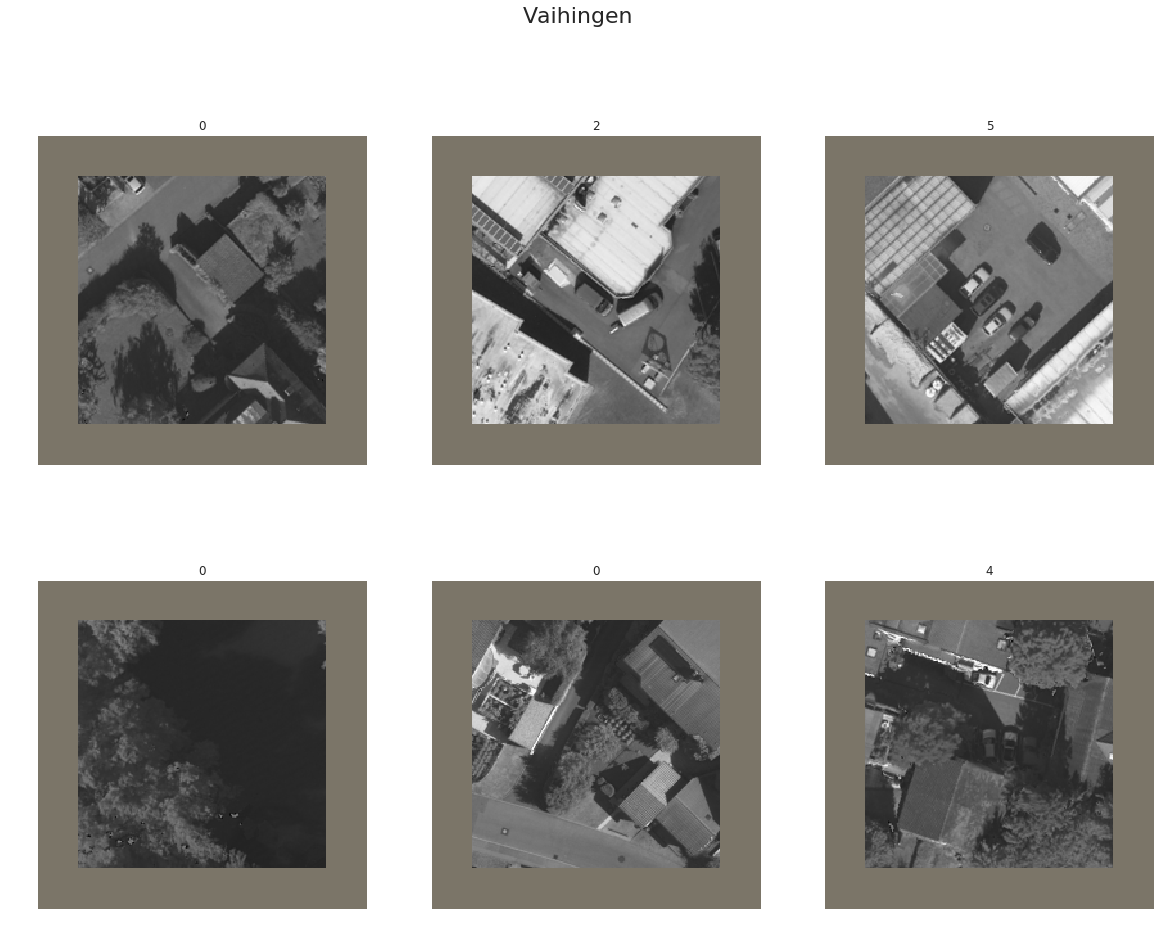

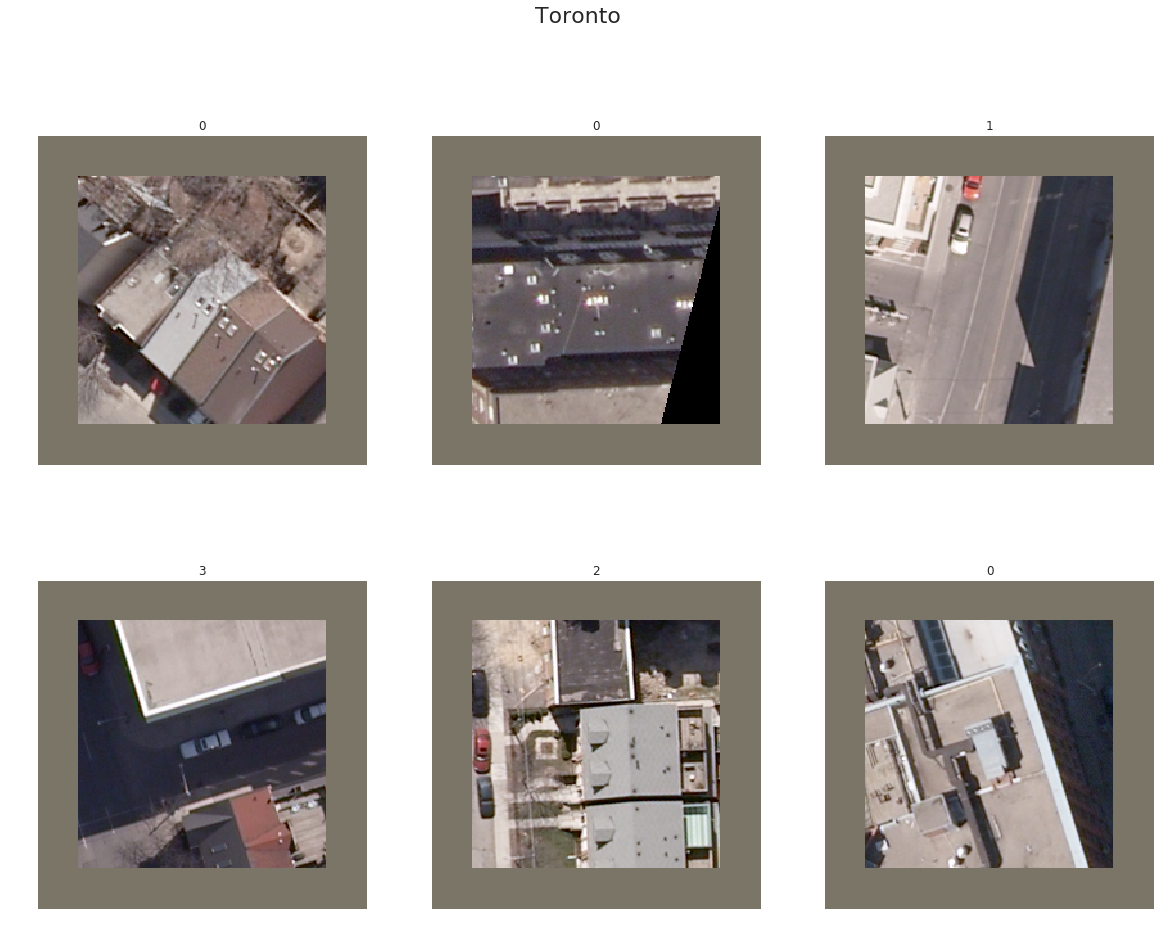

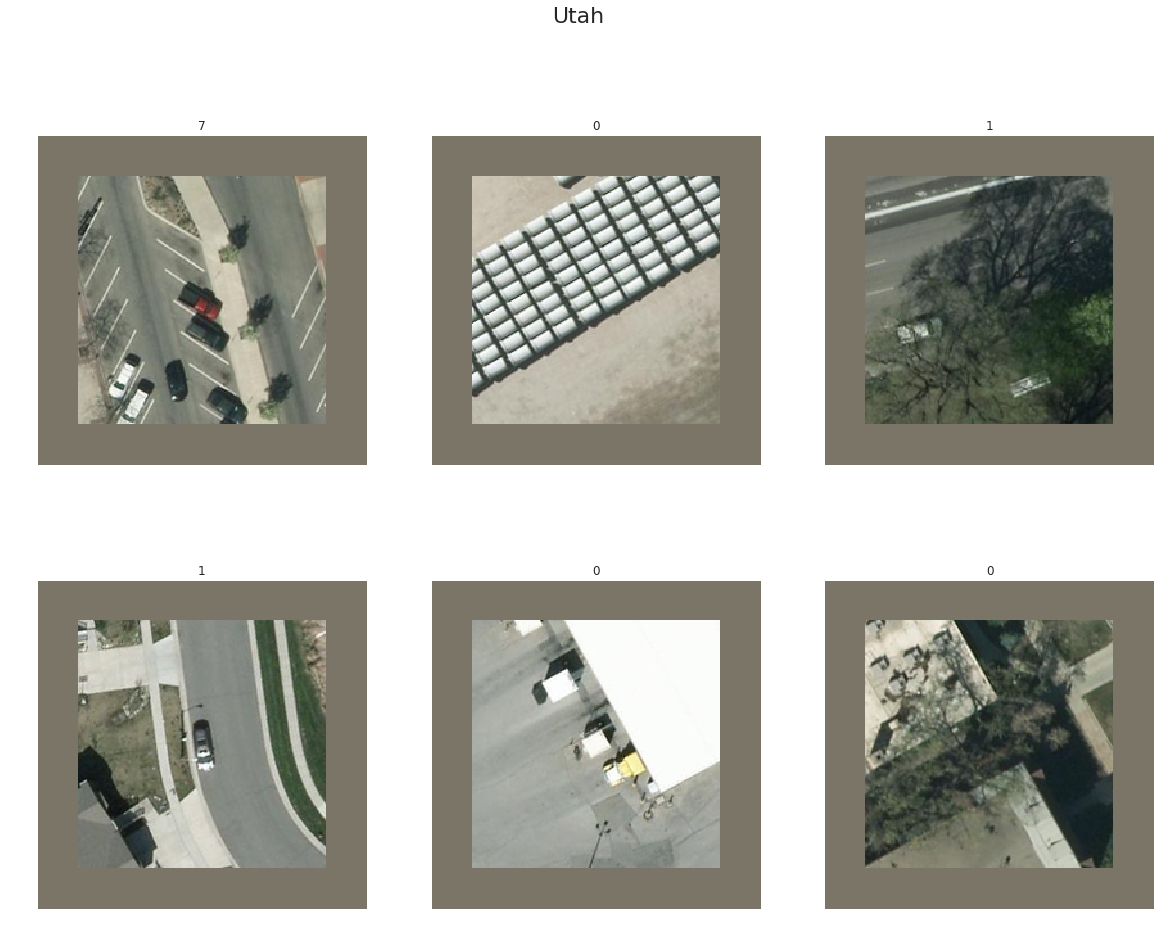

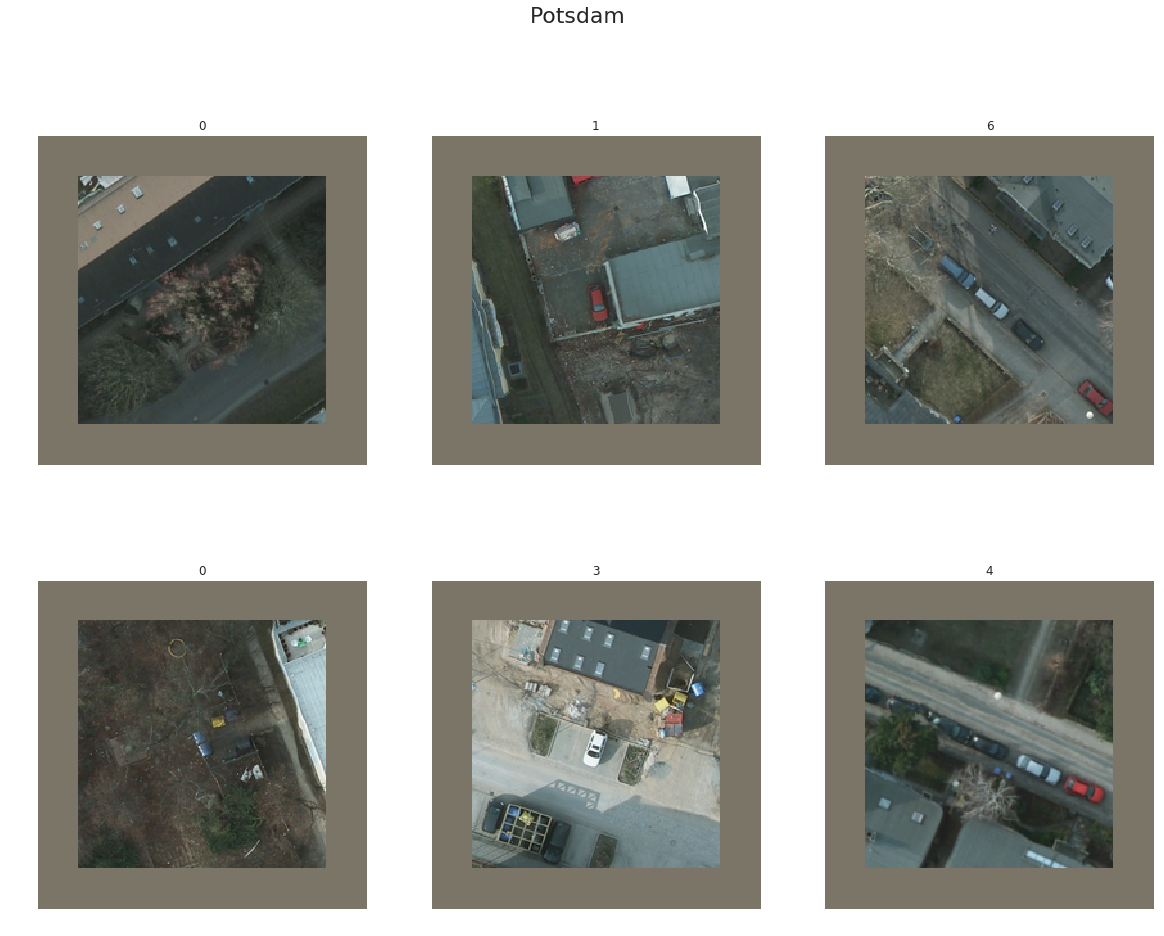

In [13]:
for file_list_name, file_list in file_list_dic.items():
    plt.figure(figsize=(20,15))
    plt.suptitle(file_list_name, fontsize=22)
    idxes = np.random.randint(1,len(file_list),6)
    for i, idx in enumerate(idxes):
        plt.subplot(2,3,i+1)
        file_path = file_list[idx]
        file_name = file_path.lstrip("../data/").replace("\\",'/')
        count = df[df['file_name']==file_name]['count'].values[0]
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(count)
plt.show()

### transform

In [15]:
import torchvision
import torchvision.transforms as transforms

class ImageTransform():
    def __init__(self, p=0.5,degrees=90):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomHorizontalFlip(p=p),
                transforms.RandomVerticalFlip(p=p),
                #transforms.Grayscale(),
                #transforms.RandomAffine(degrees=degrees),
                transforms.ToTensor(),
                #transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.ToTensor(),
                #transforms.Normalize(mean, std)
            ])
        }
    
    def __call__(self, img, phase='train'):
        return self.data_transform[phase](img)

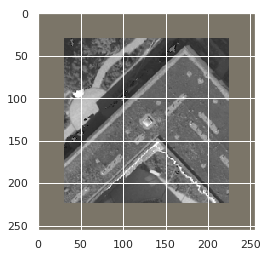

3


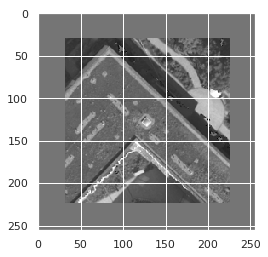

In [16]:
# 画像の読み込み
import cv2

city = 'Vaihingen'
image_file_path = file_list_dic[city][0]
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

# グレースケール化してからRGB化。グレースケールの時と同じ画像が出てくる。
# ただし、 .modeはRGBとなっている。
img = img.convert('L').convert('RGB')

transform = ImageTransform()
img_transformed = transform(img, phase='train')

# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
print(img_transformed.shape[2])
plt.imshow(img_transformed)
plt.show()

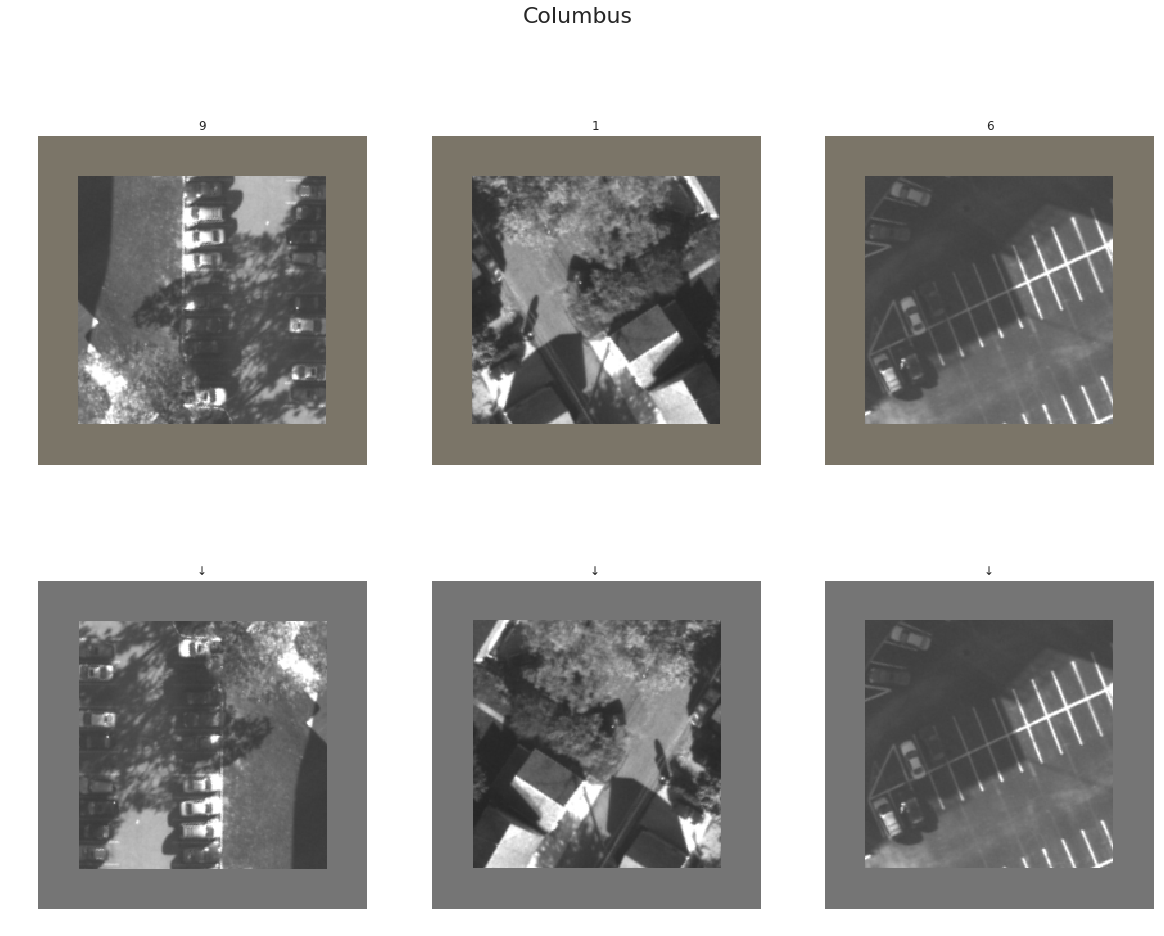

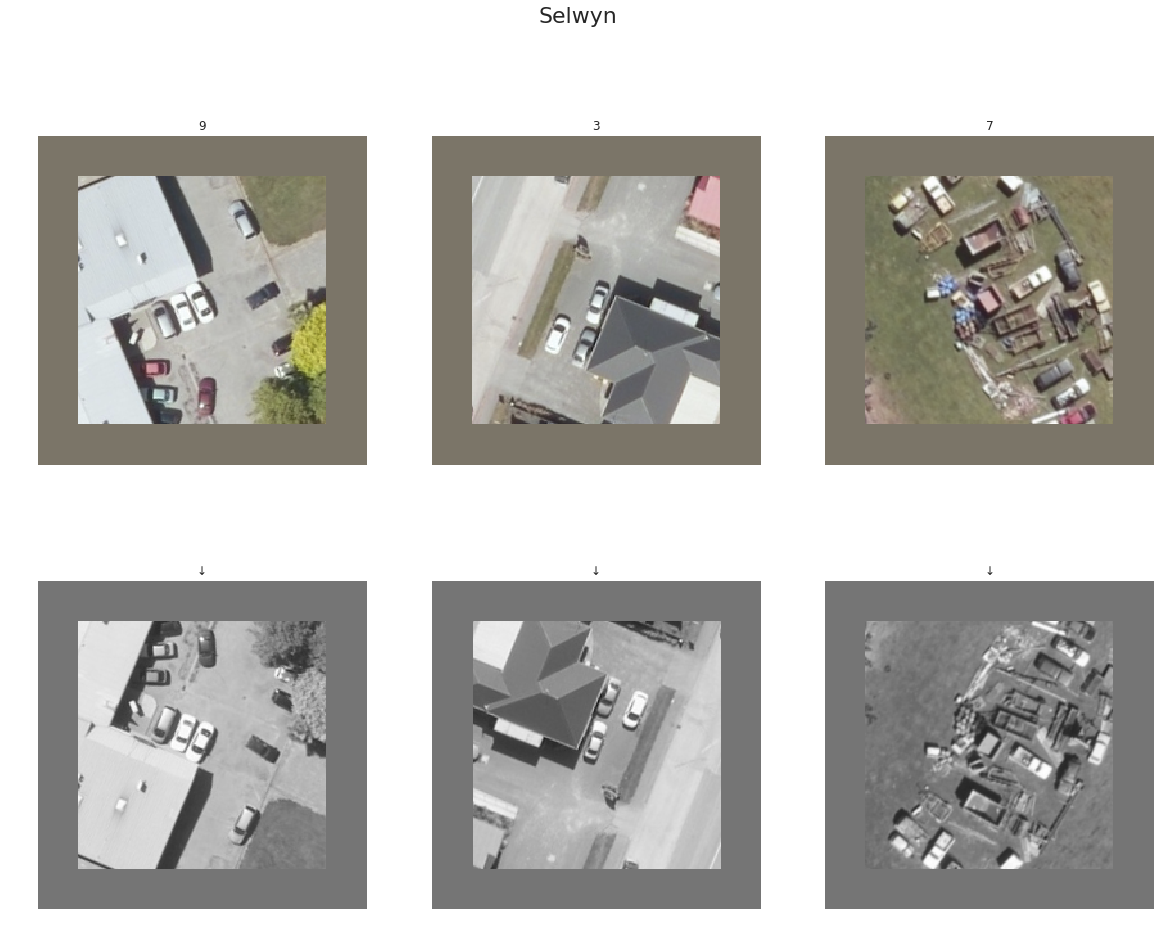

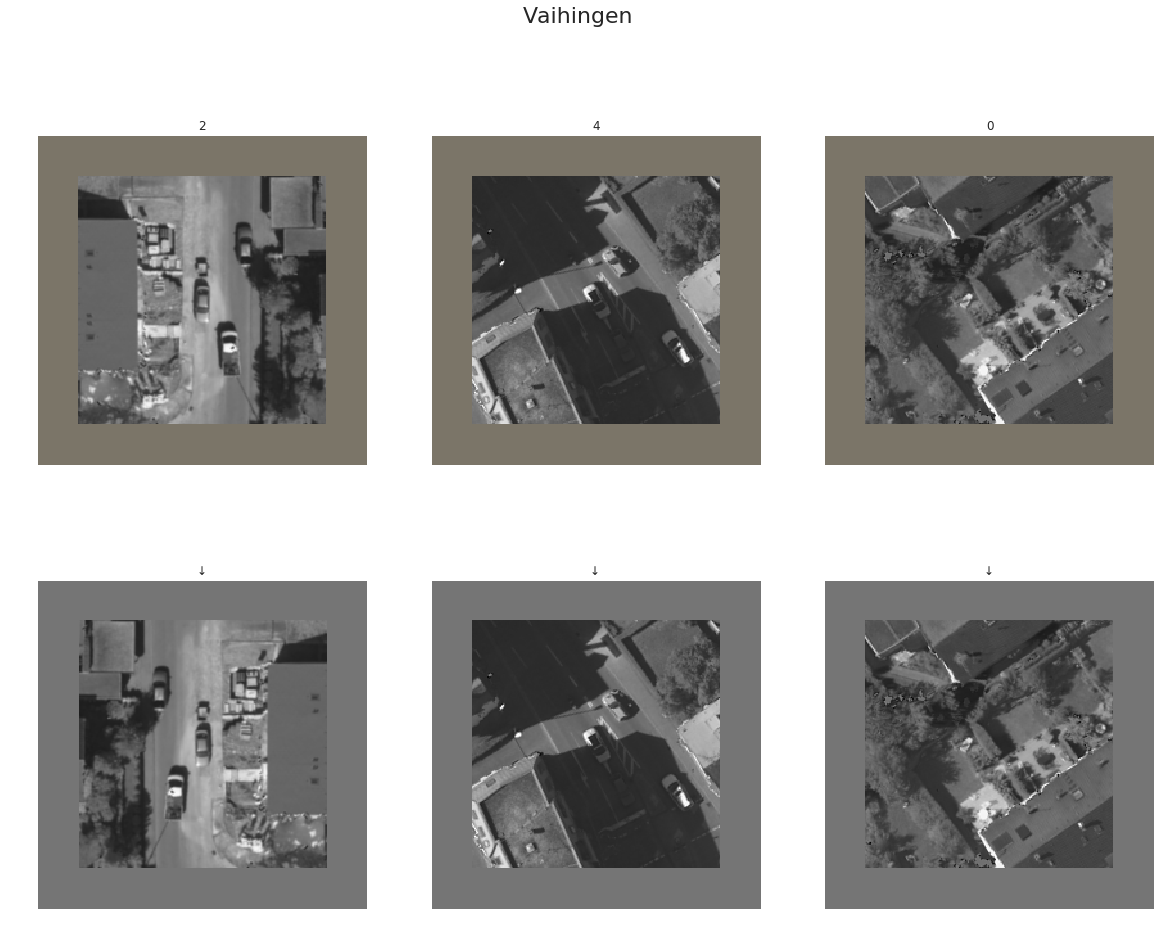

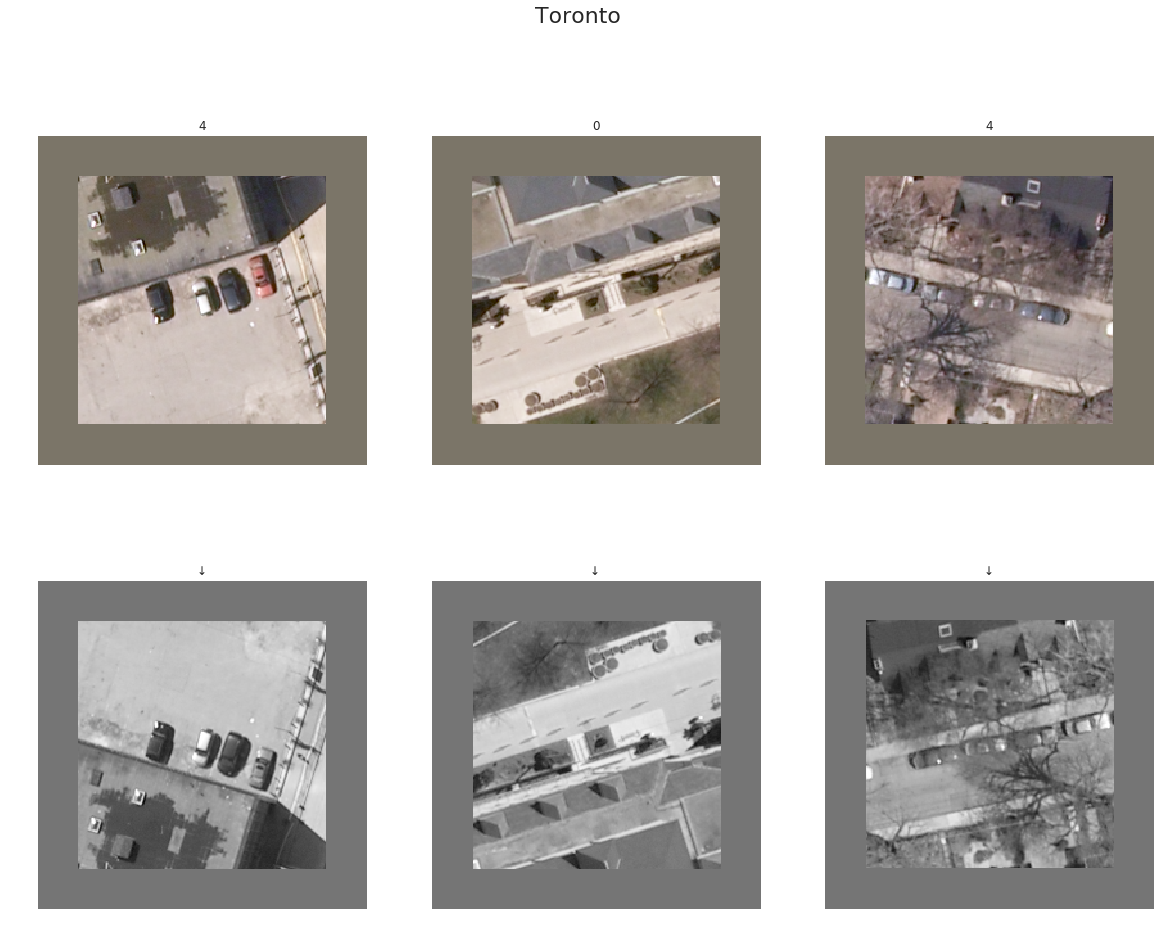

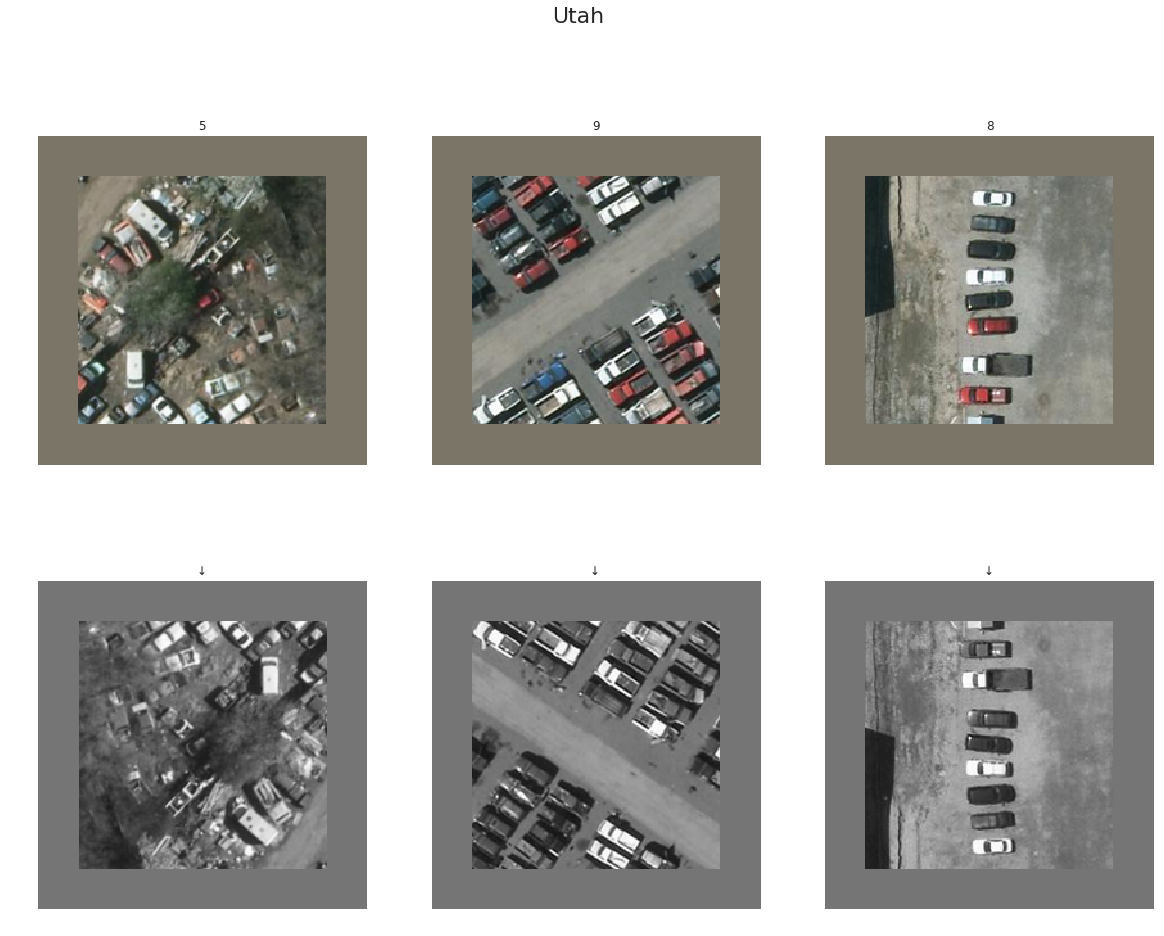

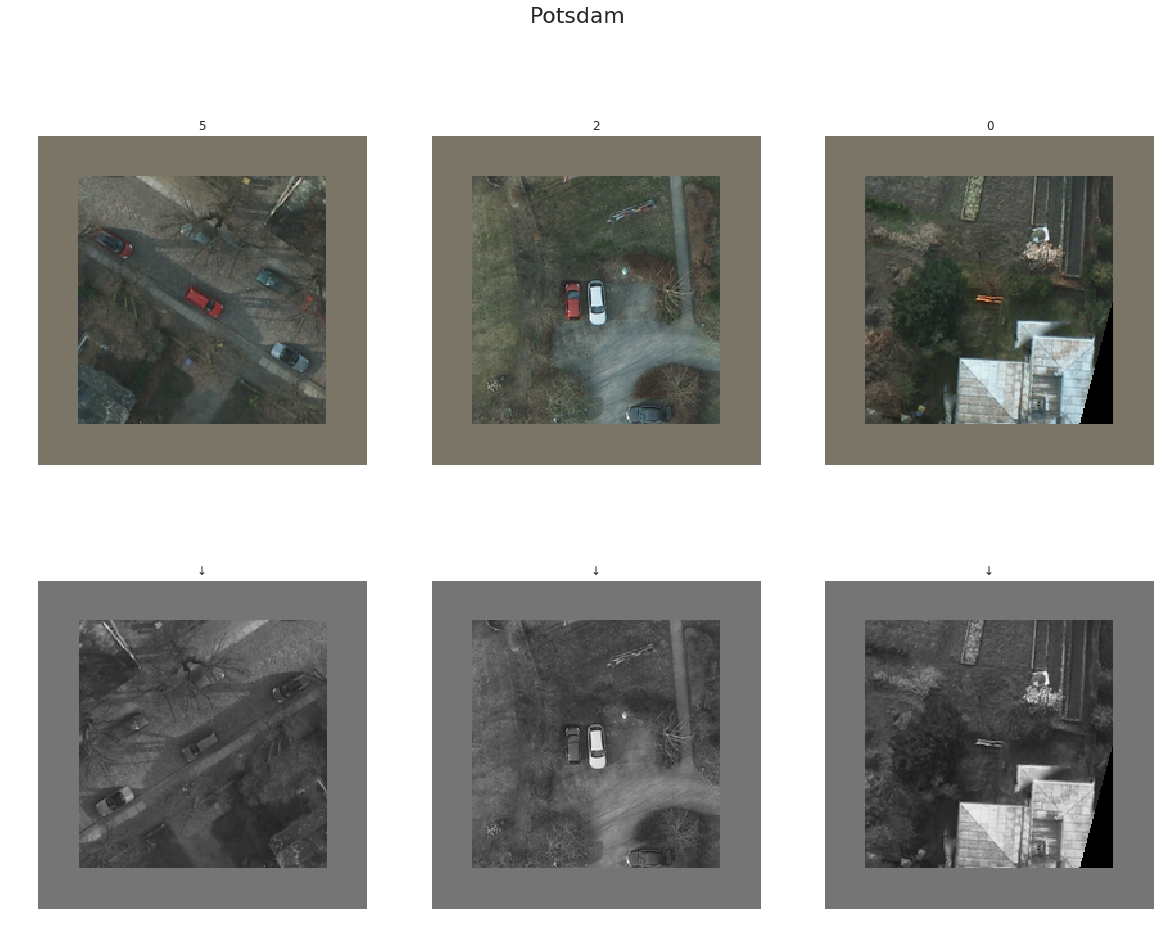

In [17]:
transform = ImageTransform()

for file_list_name, file_list in file_list_dic.items():
    plt.figure(figsize=(20,15))
    plt.suptitle(file_list_name, fontsize=22)
    idxes = np.random.randint(1,len(file_list),3)
    for i, idx in enumerate(idxes):
        plt.subplot(2,3,i+1)
        file_path = file_list[idx]
        file_name = file_path.lstrip("../data/").replace("\\",'/')
        count = df[df['file_name']==file_name]['count'].values[0]
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(count)
        
        ## 変換後を表示
        plt.subplot(2,3,i+4)
        img = img.convert('L').convert('RGB')
        img_transformed = transform(img, phase='train')
        # (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
        img_transformed = img_transformed.numpy().transpose((1, 2, 0))
        img_transformed = np.clip(img_transformed, 0, 1)
        plt.imshow(img_transformed)
        plt.axis('off')
        plt.title('↓')
plt.show()